In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [2]:
energimerke_df = pd.read_csv("energimerke_renset4.csv", encoding="utf-8")

In [3]:
energimerke_df.head(5)

,bygningskategori,byggear,postnummer,beregnetfossilandel,energikarakter,mat_Betong,mat_Murteglstein,mat_Stål,mat_Tre,mat_Ukjent
0,0,2007,5258,0.8,5,0,0,0,1,0
1,1,1936,481,0.8,1,0,1,0,0,0
2,1,1989,1188,0.8,4,1,0,0,0,0
3,1,1940,467,0.8,1,1,0,0,0,0
4,1,1960,665,0.8,1,1,0,0,0,0


In [4]:
X = energimerke_df.drop("energikarakter", axis=1)
y = energimerke_df["energikarakter"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [9]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
y_pred_rf = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.6179732133760707

In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, 
                            scoring='accuracy', n_jobs=-1)

In [16]:
print(cv_scores)

[0.6076645  0.61101478 0.61010374 0.61235685 0.61149099]


In [17]:
cv_scores.mean()

np.float64(0.6105261733152838)

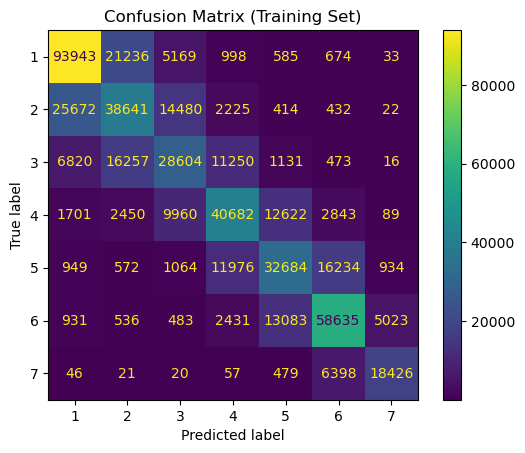

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5, n_jobs=-1)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix (Training Set)')
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train, y_train_pred, average='macro'))
print(recall_score(y_train, y_train_pred, average='macro'))

0.6058209948607652
0.6019485939195185


In [24]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='macro')

0.6035164618021643

In [25]:
%pip install -q hyperopt

Note: you may need to restart the kernel to use updated packages.
